In [40]:
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# We will be using make_circles from scikit-learn
from sklearn.datasets import make_circles

SEED = 2017

# Generate artificial binary classification data. Note that the output here is y = 0 and y =1

In [41]:
# We create an inner and outer circle
X, y = make_circles(n_samples=400, factor=.3, noise=.05, random_state=2017)
outer = y == 0
inner = y == 1

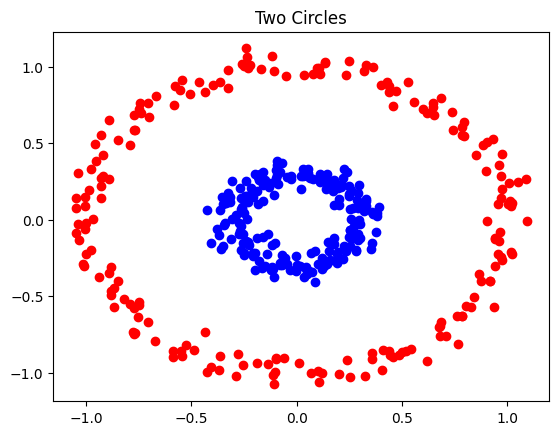

In [42]:
plt.title("Two Circles")
plt.plot(X[outer, 0], X[outer, 1], "ro")
plt.plot(X[inner, 0], X[inner, 1], "bo")
plt.show()

# Strange scaling of input vector (not sure why)

In [43]:
print(X)
X = X+1
print(X)

[[ 0.1494062  -0.26922349]
 [-0.75124943 -0.55487822]
 [ 1.0128274   0.12002885]
 [ 0.45877516  0.74139545]
 [ 0.24997688  1.03965506]
 [-0.07754711 -0.29568016]
 [ 1.02131035  0.11100715]
 [-0.19842784 -0.21504732]
 [-0.24854027 -0.22994101]
 [ 0.89814716  0.32124751]
 [-0.10127199 -0.99393575]
 [-0.74862251 -0.53458963]
 [ 0.29043788 -0.1291827 ]
 [-0.27277712 -0.01834955]
 [-0.54309321 -0.88781896]
 [-0.10477875 -0.15155923]
 [-0.25107    -0.21447236]
 [ 0.03578147  0.94698098]
 [-0.19863071  0.3015054 ]
 [ 0.35901245 -0.87324733]
 [-0.5811722   0.75216928]
 [-0.86965849 -0.44907287]
 [ 0.2389068  -0.91609015]
 [ 0.21923853  0.27001214]
 [-0.93046242  0.22107935]
 [-0.20542574  0.14893395]
 [ 0.06423333  0.27521241]
 [ 0.78530248  0.55609078]
 [-0.36567128  0.89853499]
 [-0.16042693  0.12113199]
 [-0.93716322 -0.37401396]
 [ 0.04814686  0.2865193 ]
 [-0.36617888  0.06494966]
 [ 0.50187946 -0.86133553]
 [-0.05225282  0.94245841]
 [-0.18079584  0.25806462]
 [-0.23031496  0.11504585]
 

# Split data into 80% training and 20% validation. This simple example does not generate a test set 

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [45]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

In [46]:
n_hidden = 50 # number of hidden units
n_epochs = 1000
learning_rate = 1 

In [47]:
# Initialise weights
weights_hidden = np.random.normal(0.0, size=(X_train.shape[1], n_hidden))
weights_output = np.random.normal(0.0, size=(n_hidden))

hist_loss = []
hist_accuracy = []

In [48]:
for e in range(n_epochs):
    del_w_hidden = np.zeros(weights_hidden.shape)
    del_w_output = np.zeros(weights_output.shape)

    # Loop through training data in batches of 1
    for x_, y_ in zip(X_train, y_train):
        # Forward computations
        hidden_input = np.dot(x_, weights_hidden)
        hidden_output = logistic(hidden_input)
        output = logistic(np.dot(hidden_output, weights_output)) #p( y = 1 | x)

        # Backward computations

        error = y_ - output #we can use this since y is either 0 or 1
        output_error = error * output * (1 - output)  #this is the gradient of logistic function
        

        hidden_error = np.dot(output_error, weights_output) * hidden_output * (1 - hidden_output)

      

        del_w_output += output_error * hidden_output
        del_w_hidden += hidden_error * x_[:, None]

    # Update weights
    weights_hidden += learning_rate * del_w_hidden / X_train.shape[0]
    weights_output += learning_rate * del_w_output / X_train.shape[0]

    # Print stats (validation loss and accuracy)
    if e % 100 == 0:
        hidden_output = logistic(np.dot(X_val, weights_hidden))
        out = logistic(np.dot(hidden_output, weights_output))

        #mean square error 
        loss = np.mean((out - y_val) ** 2)

        #cross entropy error
        #loss  = np.mean(-(y_val *np.log(out)) - ((1-y_val)*np.log(1-out)))

        # Final prediction is based on a threshold of 0.5
        predictions = out > 0.5
        accuracy = np.mean(predictions == y_val)
        print("Epoch: ", '{:>4}'.format(e), 
            "; Validation loss: ", '{:>6}'.format(loss.round(4)), 
            "; Validation accuracy: ", '{:>6}'.format(accuracy.round(4)))

Epoch:     0 ; Validation loss:  0.3425 ; Validation accuracy:  0.5875
Epoch:   100 ; Validation loss:  0.2223 ; Validation accuracy:     0.6
Epoch:   200 ; Validation loss:  0.1914 ; Validation accuracy:  0.7625
Epoch:   300 ; Validation loss:  0.1651 ; Validation accuracy:  0.8375
Epoch:   400 ; Validation loss:  0.1416 ; Validation accuracy:   0.875
Epoch:   500 ; Validation loss:  0.1213 ; Validation accuracy:  0.9125
Epoch:   600 ; Validation loss:  0.1051 ; Validation accuracy:   0.925
Epoch:   700 ; Validation loss:  0.0926 ; Validation accuracy:  0.9375
Epoch:   800 ; Validation loss:  0.0827 ; Validation accuracy:    0.95
Epoch:   900 ; Validation loss:  0.0748 ; Validation accuracy:  0.9875


In [49]:
%whos

Variable           Type        Data/Info
----------------------------------------
SEED               int         2017
X                  ndarray     400x2: 800 elems, type `float64`, 6400 bytes
X_train            ndarray     320x2: 640 elems, type `float64`, 5120 bytes
X_val              ndarray     80x2: 160 elems, type `float64`, 1280 bytes
accuracy           float64     0.9875
del_w_hidden       ndarray     2x50: 100 elems, type `float64`, 800 bytes
del_w_output       ndarray     50: 50 elems, type `float64`, 400 bytes
e                  int         999
error              float64     -0.17524764253492398
hidden_error       ndarray     50: 50 elems, type `float64`, 400 bytes
hidden_input       ndarray     50: 50 elems, type `float64`, 400 bytes
hidden_output      ndarray     50: 50 elems, type `float64`, 400 bytes
hist_accuracy      list        n=0
hist_loss          list        n=0
inner              ndarray     400: 400 elems, type `bool`, 400 bytes
learning_rate      int         1